## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [0]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [0]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [0]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
num_classes=10

def build_mlp():
    """Code Here
    建立你的神經網路
    """
    model = Sequential()

    model.add(Dense(128,input_dim=3072,activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32, activation ='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model
model = build_mlp()

In [26]:
model.summary()
#from keras.utils import plot_model
#plot_model(model, to_file='model.png')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 420,522
Trainable params: 420,522
Non-trainable params: 0
________________________________________________

In [0]:
"""
Compile 模型
"""
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/500





50000/50000 [==============================] - 5s 108us/step - loss: 2.2245 - acc: 0.1443 - val_loss: 2.0454 - val_acc: 0.2332
Epoch 2/500
50000/50000 [==============================] - 4s 86us/step - loss: 2.0494 - acc: 0.2336 - val_loss: 1.8669 - val_acc: 0.3096
Epoch 3/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.9263 - acc: 0.2978 - val_loss: 1.7592 - val_acc: 0.3729
Epoch 4/500
50000/50000 [==============================] - 4s 85us/step - loss: 1.8475 - acc: 0.3312 - val_loss: 1.7073 - val_acc: 0.3979
Epoch 5/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.7963 - acc: 0.3574 - val_loss: 1.6918 - val_acc: 0.3838
Epoch 6/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.7569 - acc: 0.3727 - val_loss: 1.6394 - val_acc: 0.4149
Epoch 7/500
50000/5

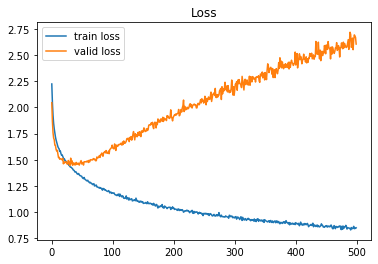

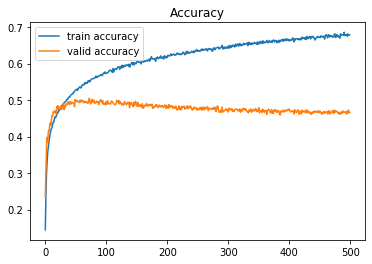

In [29]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [30]:
model=[]
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
num_classes=10


def build_mlp():
    """Code Here
    建立你的神經網路
    """
    model = Sequential()
    model.add(Dense(128,input_dim=3072,activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32, activation ='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model
model = build_mlp()
"""
Compile 模型
"""
model.compile(loss ='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


"""
設定要訓練的 Epoch 數
"""
history2= model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 83us/step - loss: 2.2597 - acc: 0.1507 - val_loss: 2.1950 - val_acc: 0.2330
Epoch 2/500
50000/50000 [==============================] - 4s 76us/step - loss: 2.1747 - acc: 0.1968 - val_loss: 2.1009 - val_acc: 0.2737
Epoch 3/500
50000/50000 [==============================] - 4s 77us/step - loss: 2.1087 - acc: 0.2217 - val_loss: 2.0164 - val_acc: 0.2948
Epoch 4/500
50000/50000 [==============================] - 4s 76us/step - loss: 2.0556 - acc: 0.2454 - val_loss: 1.9636 - val_acc: 0.3090
Epoch 5/500
50000/50000 [==============================] - 4s 76us/step - loss: 2.0165 - acc: 0.2628 - val_loss: 1.9047 - val_acc: 0.3379
Epoch 6/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.9880 - acc: 0.2729 - val_loss: 1.8761 - val_acc: 0.3468
Epoch 7/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.9611 - acc: 0.2827 - val_loss: 1.8618 - 

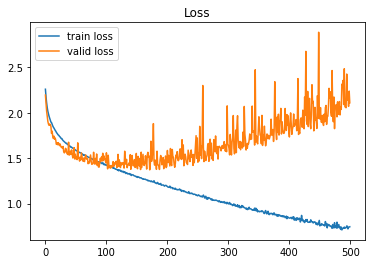

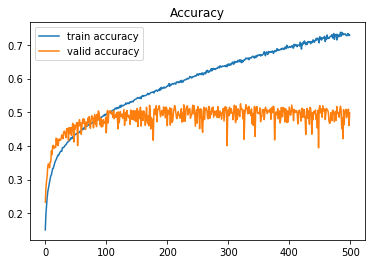

In [31]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()